<a href="https://colab.research.google.com/github/eryyyj/Machine_Learning/blob/main/Final_Project/PISALBON_Final_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<hr>|<hr>
**ACTIVITY** | **Final Project**
 Name | **Pisalbon, Ery Jay**
**Section** | CPE31S31
**Date Performed**: | 12/5/24
**Date Submitted**: | 12/16/24
**Instructor**: | Dr. Alonica Villanueva

<hr>

### Problem

Power system transmission lines are important part of our society as it is used to connect power stations and substations that provides electricity in our home. There are cases that there are fault connections on the transmission lines that we cannot avoid that **leads to blackouts, power instability and damages of electrical equipment**. thus it must need for a reliable, fast, and secure method to identify and respond to electrical faults in transmission lines.

### Methodology

 To resolve the current problem faced on power transmission lines, we will use 3 classification model and 1 ensemble learning model to identify connection faults on power transmission lines </br> </br>

 My Methodology would be to implement classification machine learning algorithms like: Support Vector Classifier(SVC), KNN, Random Forest,  and combine those first three models using stacking classifier on the dataset given on the link fault on power transmission lines


Note! </br> </br>
Inputs - [Ia,Ib,Ic,Va,Vb,Vc] </br>
Outputs - [G C B A] </br> </br>
[0 0 0 0] - No Fault </br>
[1 0 0 1] - LG fault (Between Phase A and Gnd) </br>
[0 0 1 1] - LL fault (Between Phase A and Phase B) </br>
[1 0 1 1] - LLG Fault (Between Phases A,B and ground) </br>
[0 1 1 1] - LLL Fault(Between all three phases) </br>
[1 1 1 1] - LLLG fault( Three phase symmetrical fault) </br>

### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fpath = "/content/drive/MyDrive/DATASETS/classData.csv"

In [ ]:
fproject_data = pd.read_csv(fpath)

In [ ]:
fproject_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
# getting the number of datapoints, columns and data types of my dataset
fproject_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
print("numkber of datapoints: ", fproject_data.shape[0])
print("number of columns: ", fproject_data.shape[1])

numkber of datapoints:  7861
number of columns:  10


In [ ]:
fproject_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
# checking for null values
fproject_data.isnull().sum()

,0
G,0
C,0
B,0
A,0
Ia,0
Ib,0
Ic,0
Va,0
Vb,0
Vc,0


In [ ]:
# importing train test split
from sklearn.model_selection import train_test_split

X = fproject_data.drop(columns =['G','C','B','A'])
y = fproject_data[['G','C','B','A']]

In [ ]:
X.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
from sklearn.preprocessing import minmax_scale
# standardizing the predictors
scaler = minmax_scale(X=X)
X_scaled = pd.DataFrame(scaler,columns=X.columns)

In [ ]:
# checking the scaled data
X_scaled.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,0.413869,0.497571,0.543058,0.839985,0.384404,0.284358
1,0.309366,0.460370,0.505251,0.767607,0.391930,0.349258
2,0.215144,0.405429,0.449635,0.728956,0.399481,0.380317
3,0.163683,0.381381,0.424998,0.704108,0.407055,0.397513
4,0.135580,0.377775,0.420857,0.682749,0.414650,0.411189


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Ia,Ib,Ic,Va,Vb,Vc
432,0.004506,0.471883,0.495997,0.581081,0.628142,0.295585
7196,0.525344,0.489753,0.480792,0.845155,0.643498,0.015167
3027,0.506726,0.796374,0.194813,0.888479,0.515676,0.101974
2937,0.463806,0.871726,0.161668,0.403707,0.471233,0.633311
5438,0.908637,0.528971,0.508073,0.550884,0.187341,0.775022


In [ ]:
y_train.head()

,G,C,B,A
432,1,0,0,1
7196,0,0,0,0
3027,0,1,1,0
2937,0,1,1,0
5438,1,1,1,1


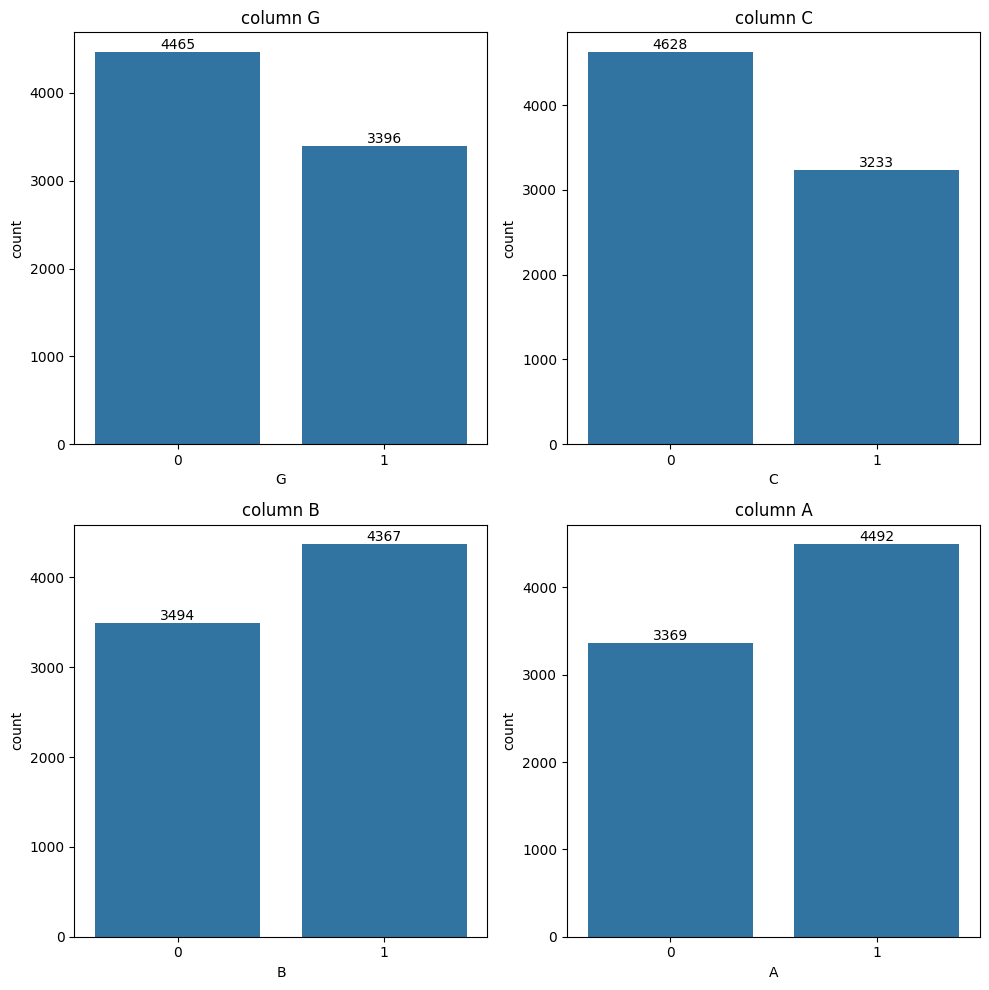

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.countplot(x='G', data=fproject_data, ax=ax[0,0])
ax[0,0].set_title('column G')
ax[0,0].bar_label(ax[0,0].containers[0])

sns.countplot(x='C', data=fproject_data, ax=ax[0,1])
ax[0,1].set_title('column C')
ax[0,1].bar_label(ax[0,1].containers[0])

sns.countplot(x='B', data=fproject_data, ax=ax[1,0])
ax[1,0].set_title('column B')
ax[1,0].bar_label(ax[1,0].containers[0])

sns.countplot(x='A', data=fproject_data, ax=ax[1,1])
ax[1,1].set_title('column A')
ax[1,1].bar_label(ax[1,1].containers[0])

plt.tight_layout()

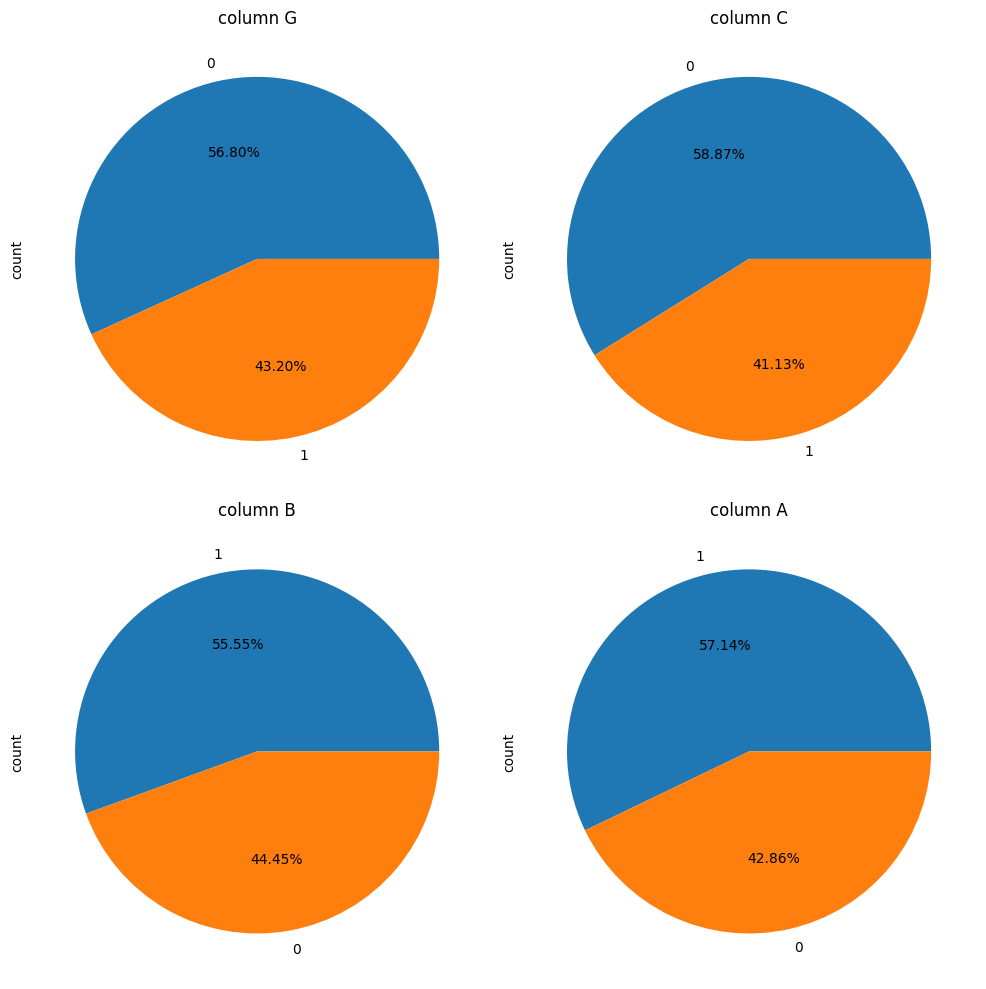

In [ ]:
# getting the percentage of outputs per column in y

fig , ax = plt.subplots(2,2, figsize=(10,10))

fproject_data['G'].value_counts().plot(kind='pie',autopct = '%1.2f%%', ax=ax[0,0])
ax[0,0].set_title('column G')

fproject_data['C'].value_counts().plot(kind='pie',autopct = '%1.2f%%', ax=ax[0,1])
ax[0,1].set_title('column C')

fproject_data['B'].value_counts().plot(kind='pie',autopct = '%1.2f%%', ax=ax[1,0])
ax[1,0].set_title('column B')

fproject_data['A'].value_counts().plot(kind='pie',autopct = '%1.2f%%', ax=ax[1,1])
ax[1,1].set_title('column A')

plt.tight_layout()

<Axes: ylabel='Density'>

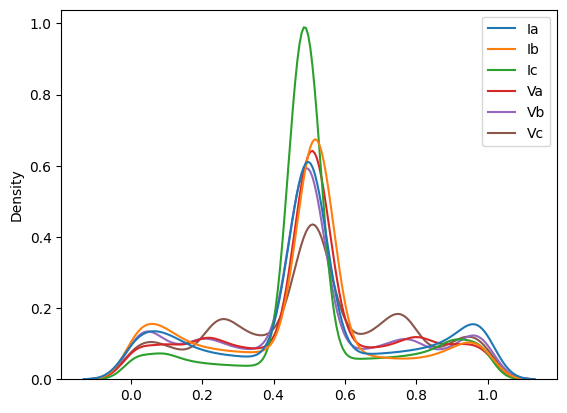

In [ ]:
# plotting the distirbution of the X scaled data using kde plot

sns.kdeplot(data=X_scaled)

In [ ]:
fproject_data_copy = fproject_data.copy()

In [ ]:
fproject_data_copy['faultType'] = fproject_data['G'].astype(str) + fproject_data['C'].astype(str) + fproject_data['B'].astype(str) + fproject_data['A'].astype(str)

In [ ]:
fproject_data_copy.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [ ]:
fproject_data_copy.replace({'0000':'NO Fault',
                            '1001':'Line A to Ground Fault',
                            '0110':'Line B to Line C Fault',
                            '1011':'Line A Line B to Ground Fault',
                            '0111':'Line A Line B Line C',
                            '1111':'Line A Line B Line C to Ground Fault'},inplace=True)

In [ ]:
fproject_data_copy.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [ ]:
fproject_data_copy.drop(columns=['G','C','B','A'],inplace=True)

In [ ]:
fproject_data_copy.head()

,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


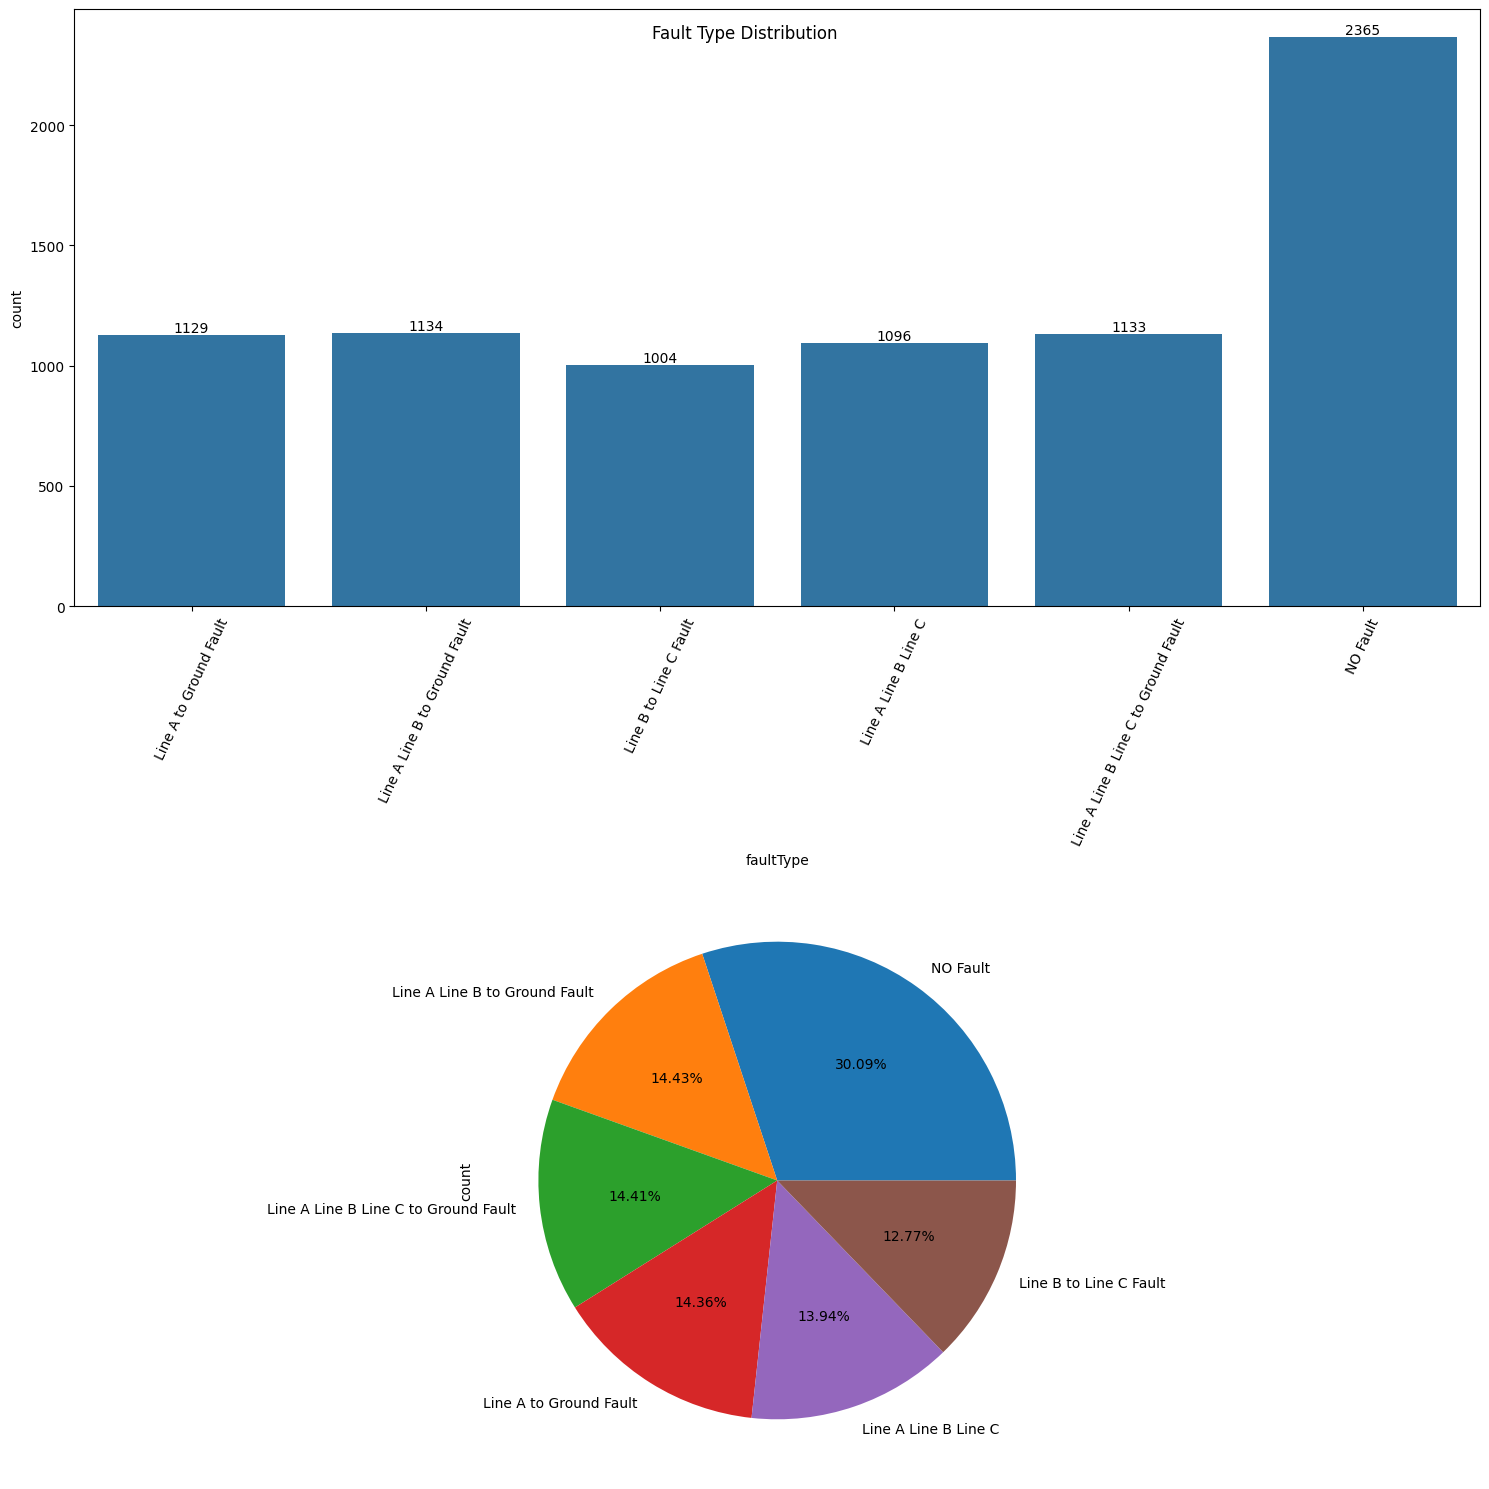

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='faultType', data=fproject_data_copy)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=65)
plt.tight_layout()

ax= plt.subplot(2,1,2)
ax = fproject_data_copy['faultType'].value_counts().plot(kind='pie',autopct = '%1.2f%%')
plt.tight_layout()

plt.suptitle('Fault Type Distribution')

In [ ]:
pd.DataFrame(X_scaled).skew()

,0
Ia,0.022420
Ib,-0.043329
Ic,0.152527
Va,-0.049521
Vb,0.045127
Vc,-0.048414


In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

for i in range(1,7):
  pca = PCA(n_components=i)
  pca.fit(X_scaled)
  pca_list.append(pd.Series({'n':i,
                             'model':pca,
                             'variance_ratio':pca.explained_variance_ratio_.sum()}))

In [ ]:
pcal = pd.DataFrame(pca_list).set_index('n')
pcal

,model,variance_ratio
n,,
1,PCA(n_components=1),0.332486
2,PCA(n_components=2),0.574723
3,PCA(n_components=3),0.789428
4,PCA(n_components=4),0.974371
5,PCA(n_components=5),1.000000
6,PCA(n_components=6),1.000000


Text(0, 0.5, 'Variance Ratio')

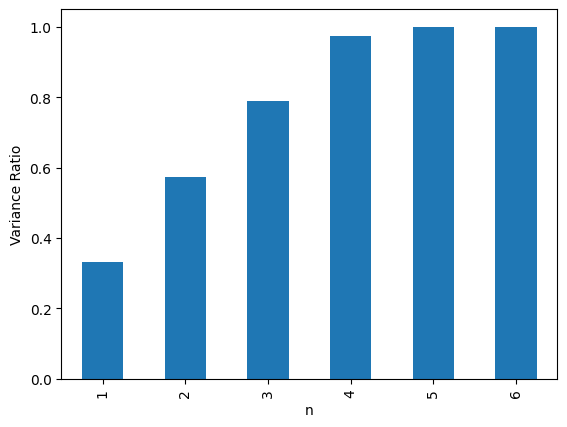

In [ ]:
# plotting the variance per number of pca components
ax = pcal['variance_ratio'].plot(kind='bar')
ax.set_ylabel('Variance Ratio')

### SVC using Pipeline and GridSearch

In [ ]:
# doing pipeline with svc with grid search
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# importing multioutputclassifier
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(SVC())

pipe = Pipeline([('pca', PCA(n_components=5)), ('model', model)])

param_grid = {
    'model__estimator__gamma': [0.1, 1, 10,20,30],
    'model__estimator__C': [0.1, 1, 10,20,30]
    }

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END model__estimator__C=0.1, model__estimator__gamma=0.1;, score=0.053 total time=   8.4s
[CV 2/5] END model__estimator__C=0.1, model__estimator__gamma=0.1;, score=0.049 total time=   5.9s
[CV 3/5] END model__estimator__C=0.1, model__estimator__gamma=0.1;, score=0.049 total time=   4.3s
[CV 4/5] END model__estimator__C=0.1, model__estimator__gamma=0.1;, score=0.055 total time=   4.3s
[CV 5/5] END model__estimator__C=0.1, model__estimator__gamma=0.1;, score=0.060 total time=   5.8s
[CV 1/5] END model__estimator__C=0.1, model__estimator__gamma=1;, score=0.583 total time=   1.8s
[CV 2/5] END model__estimator__C=0.1, model__estimator__gamma=1;, score=0.589 total time=   1.8s
[CV 3/5] END model__estimator__C=0.1, model__estimator__gamma=1;, score=0.603 total time=   1.8s
[CV 4/5] END model__estimator__C=0.1, model__estimator__gamma=1;, score=0.597 total time=   1.8s
[CV 5/5] END model__estimator__C=0.1, model__estimator_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('model',
                                        MultiOutputClassifier(estimator=SVC()))]),
             param_grid={'model__estimator__C': [0.1, 1, 10, 20, 30],
                         'model__estimator__gamma': [0.1, 1, 10, 20, 30]},
             verbose=3)

In [ ]:
# printing the best parameters
print(grid_search.best_params_)

{'model__estimator__C': 30, 'model__estimator__gamma': 10}


In [ ]:
# getting the best parameters
grid_search.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('model',
                 MultiOutputClassifier(estimator=SVC(C=30, gamma=10)))])

In [ ]:
# validating with the grid search best parameter
y_pred_test = grid_search.predict(X_test)

In [ ]:
y_pred_train = grid_search.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score
accuracy_score(y_train, y_pred_train)

0.8695928753180662

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8601398601398601

In [ ]:
# getting the roc_auc_score
y_test_roc = roc_auc_score(y_test, y_pred_test)
y_train_roc = roc_auc_score(y_train, y_pred_train)
print("train roc_auc_score: ", y_train_roc)
print("test roc_auc_score: ", y_test_roc)

train roc_auc_score:  0.9661347901729711
test roc_auc_score:  0.9636691532052382


In [ ]:
print('Classification report of testing set:')
print(classification_report(y_test, y_pred_test))

Classification report of testing set:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       691
           1       1.00      1.00      1.00       611
           2       1.00      0.99      1.00       849
           3       1.00      1.00      1.00       890

   micro avg       0.97      0.96      0.96      3041
   macro avg       0.97      0.95      0.96      3041
weighted avg       0.97      0.96      0.96      3041
 samples avg       0.68      0.67      0.67      3041



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Classification report of training set:')
print(classification_report(y_train, y_pred_train))

Classification report of training set:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2705
           1       1.00      1.00      1.00      2622
           2       1.00      0.99      1.00      3518
           3       1.00      1.00      1.00      3602

   micro avg       0.97      0.96      0.97     12447
   macro avg       0.97      0.96      0.96     12447
weighted avg       0.97      0.96      0.97     12447
 samples avg       0.69      0.68      0.68     12447



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_testarr = np.array(y_test)

In [ ]:
y_trainarr = np.array(y_train)

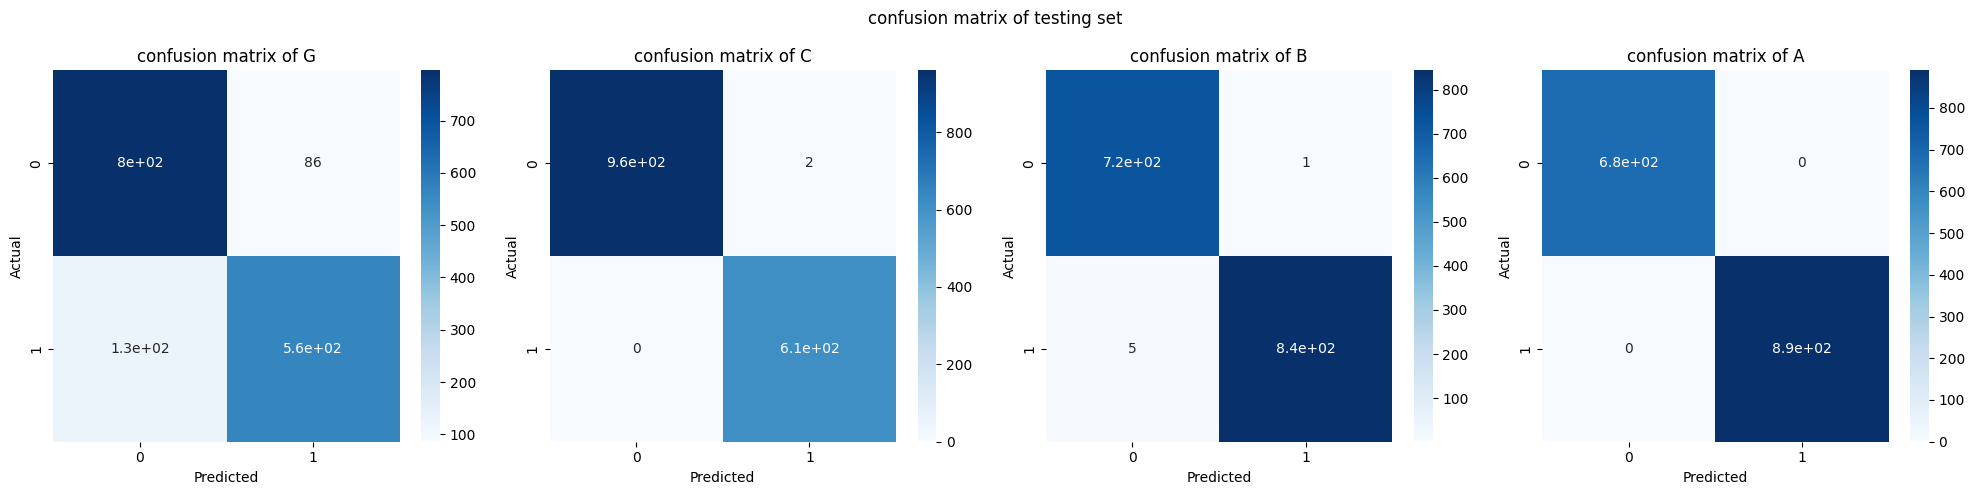

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  sns.heatmap(confusion_matrix(y_testarr[:,i], y_pred_test[:,i]), annot=True, cmap='Blues',ax=ax[i])
  ax[i].set_title(f'confusion matrix of {y.columns[i]}')
  ax[i].set_xlabel('Predicted')
  ax[i].set_ylabel('Actual')

plt.suptitle('confusion matrix of testing set')
plt.tight_layout()


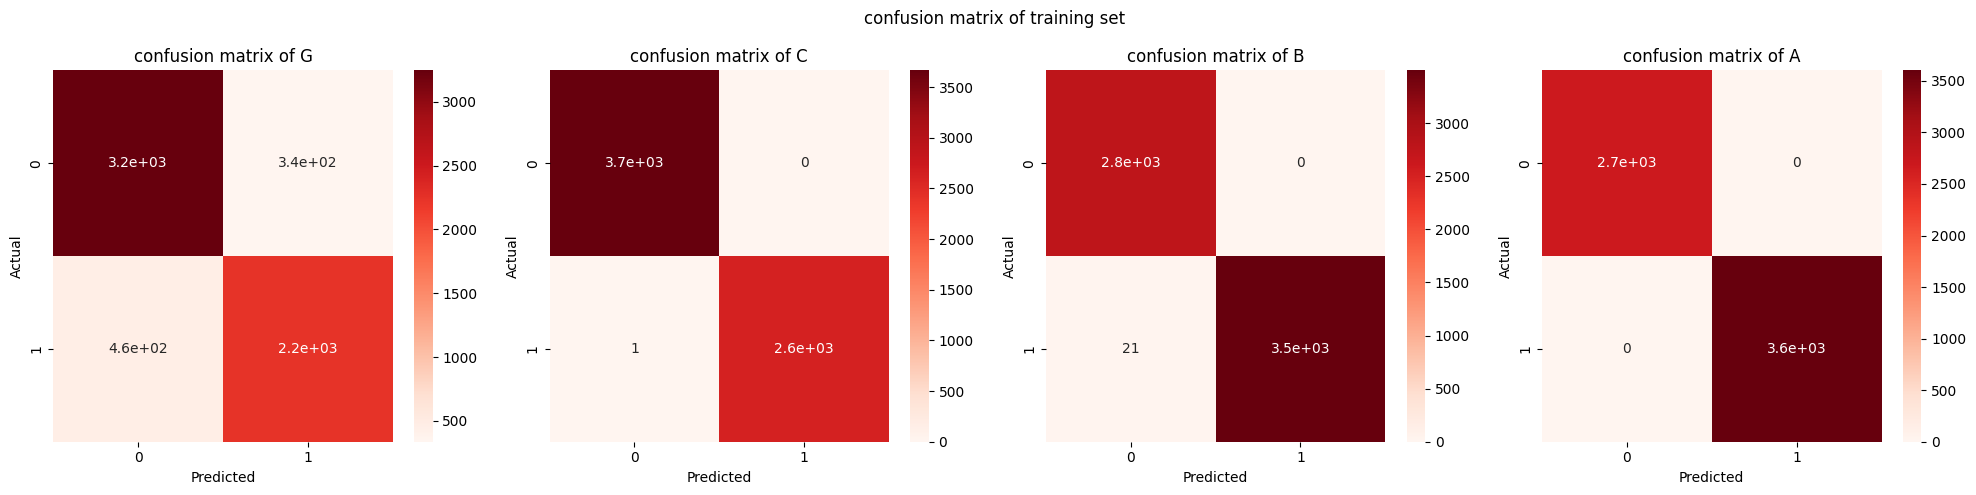

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  sns.heatmap(confusion_matrix(y_trainarr[:,i], y_pred_train[:,i]), annot=True, cmap='Reds',ax=ax[i])
  ax[i].set_title(f'confusion matrix of {y.columns[i]}')
  ax[i].set_xlabel('Predicted')
  ax[i].set_ylabel('Actual')

plt.suptitle('confusion matrix of training set')
plt.tight_layout()

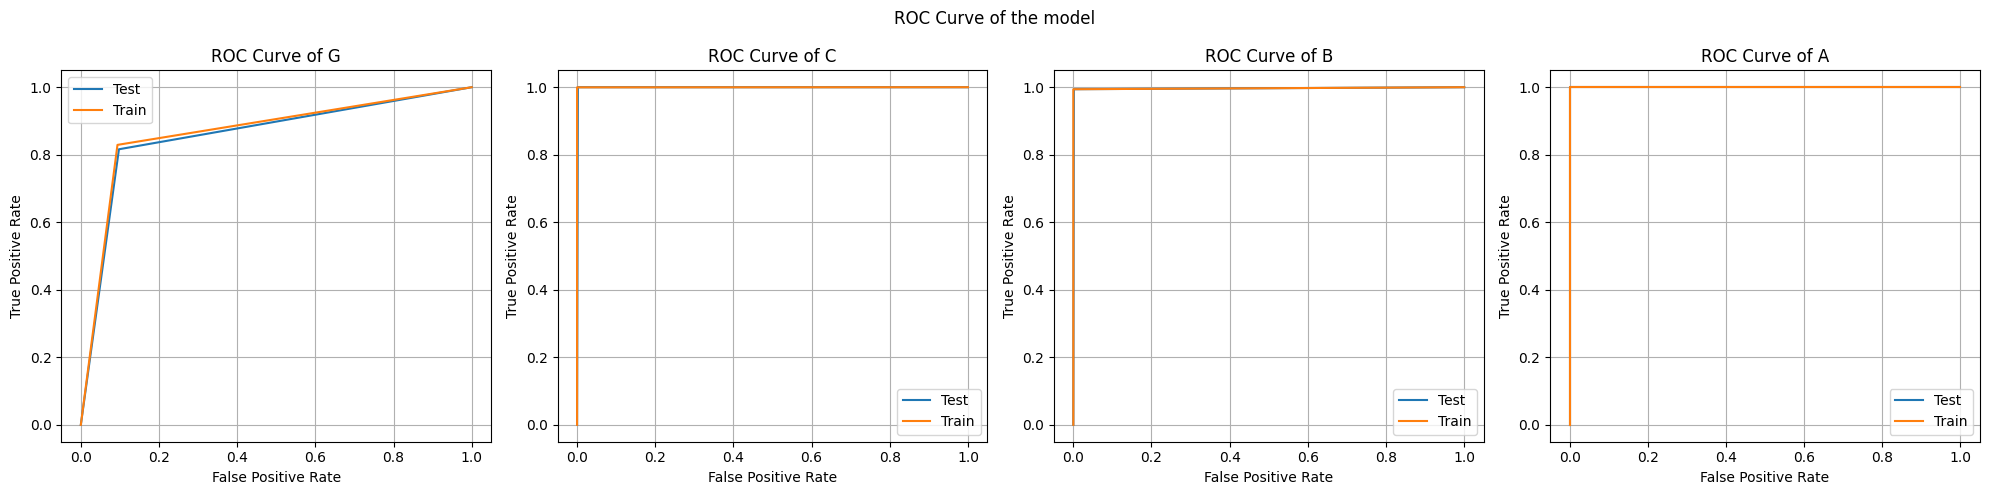

In [ ]:
# plotting the roc auc of test and training
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(1,4,figsize=(20,5))

for i in range(4):
  fpr_test, tpr_test, thresholds  = roc_curve(y_testarr[:,i], y_pred_test[:,i])
  fpr_train, tpr_train, thresholds = roc_curve(y_trainarr[:,i], y_pred_train[:,i])
  ax[i].plot(fpr_test, tpr_test, label=f'test {y.columns[i]}')
  ax[i].plot(fpr_train, tpr_train, label=f'train {y.columns[i]}')
  ax[i].set_xlabel('False Positive Rate')
  ax[i].set_ylabel('True Positive Rate')
  ax[i].set_title(f'ROC Curve of {y.columns[i]}')
  ax[i].legend(['Test','Train'])
  ax[i].grid(True)

plt.suptitle('ROC Curve of the model')
plt.tight_layout()

### KNN with GridSearch

In [ ]:
# use KNN using using grid search

from sklearn.neighbors import KNeighborsClassifier

# setting up the parameters for knn
param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

gs_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=3,scoring='accuracy')
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.762 total time=   0.4s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.792 total time=   0.2s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.793 total time=   0.3s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.778 total time=   0.2s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.780 total time=   0.2s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.849 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.862 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.864 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.794 total time=   0.2s
[CV 2/5] END n_neighbors=3, p=2

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
print(f'best parameter for knn is: {gs_model.best_params_}')

best parameter for knn is: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [ ]:
gs_model.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
gs_model.best_score_

0.8672073589804882

In [ ]:
y_pred_test = gs_model.predict(X_test)
y_pred_train = gs_model.predict(X_train)

In [ ]:
print(f'accuracy of training set: {accuracy_score(y_train, y_pred_train)}')
print(f'accuracy of testing set: {accuracy_score(y_test, y_pred_test)}')

accuracy of training set: 1.0
accuracy of testing set: 0.8976478067387158


In [ ]:
print('Classification report of testing set:')
print(classification_report(y_test, y_pred_test))

Classification report of testing set:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       691
           1       1.00      1.00      1.00       611
           2       1.00      0.99      1.00       849
           3       1.00      1.00      1.00       890

   micro avg       0.98      0.97      0.97      3041
   macro avg       0.97      0.97      0.97      3041
weighted avg       0.98      0.97      0.97      3041
 samples avg       0.68      0.68      0.68      3041



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Classification report of training set:')
print(classification_report(y_train, y_pred_train))

Classification report of training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2705
           1       1.00      1.00      1.00      2622
           2       1.00      1.00      1.00      3518
           3       1.00      1.00      1.00      3602

   micro avg       1.00      1.00      1.00     12447
   macro avg       1.00      1.00      1.00     12447
weighted avg       1.00      1.00      1.00     12447
 samples avg       0.70      0.70      0.70     12447



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('roc_auc_score of testing set:')
print(roc_auc_score(y_test, y_pred_test))

roc_auc_score of testing set:
0.9735344114165787


In [ ]:
print('roc_auc_score of training set:')
print(roc_auc_score(y_train, y_pred_train))

roc_auc_score of training set:
1.0


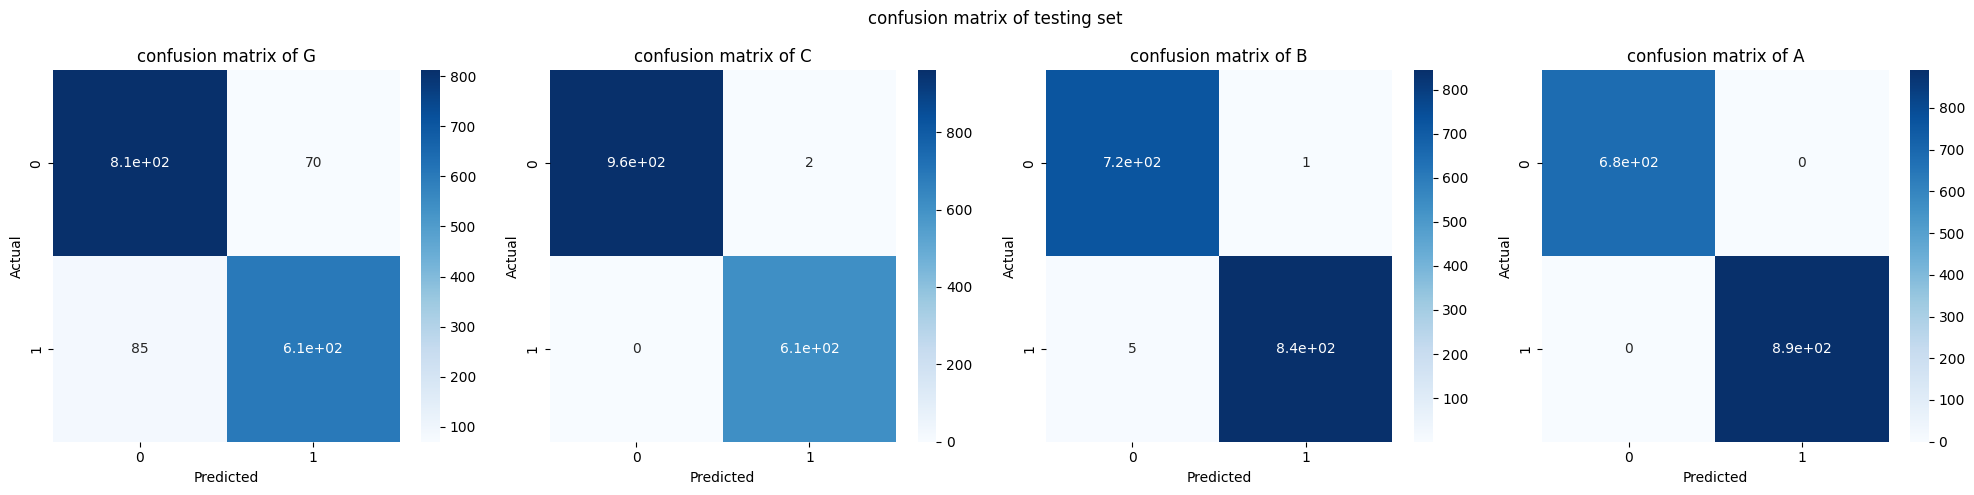

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  sns.heatmap(confusion_matrix(y_testarr[:,i], y_pred_test[:,i]), annot=True, cmap='Blues',ax=ax[i])
  ax[i].set_title(f'confusion matrix of {y.columns[i]}')
  ax[i].set_xlabel('Predicted')
  ax[i].set_ylabel('Actual')

plt.suptitle('confusion matrix of testing set')
plt.tight_layout()

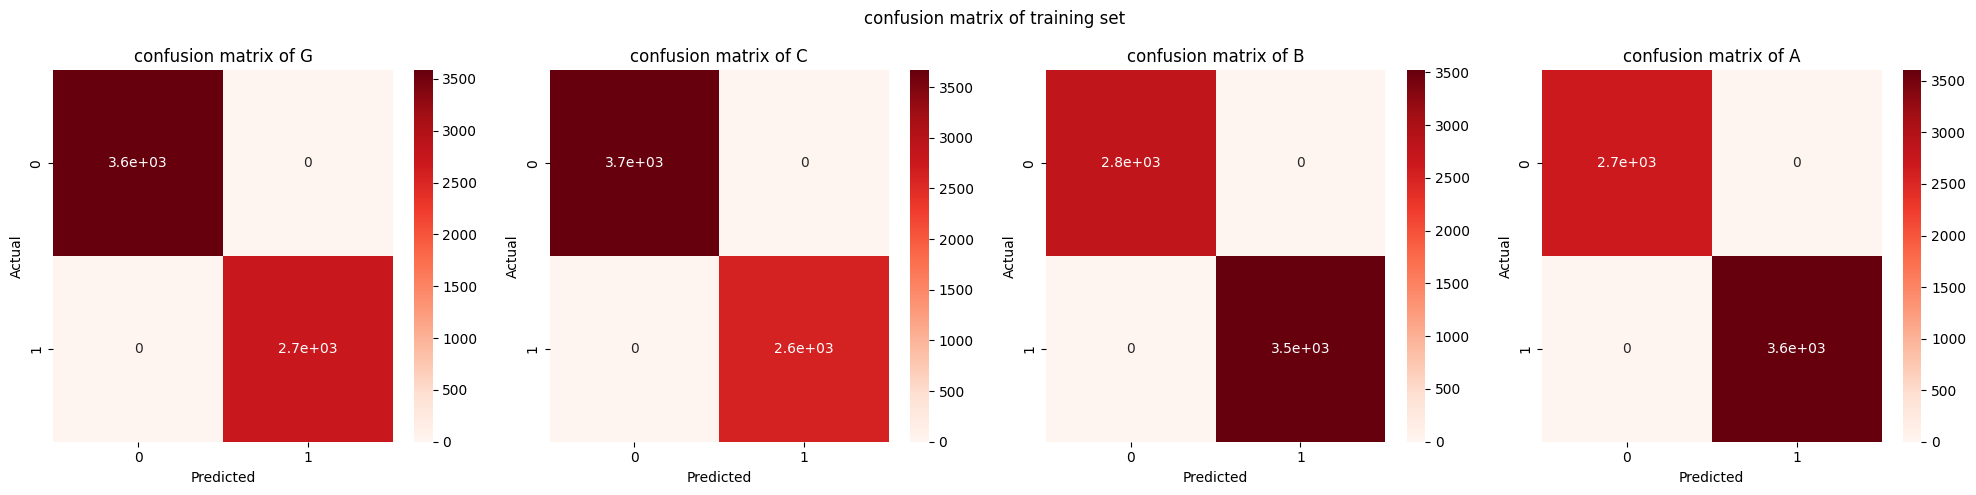

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  sns.heatmap(confusion_matrix(y_trainarr[:,i], y_pred_train[:,i]), annot=True, cmap='Reds',ax=ax[i])
  ax[i].set_title(f'confusion matrix of {y.columns[i]}')
  ax[i].set_xlabel('Predicted')
  ax[i].set_ylabel('Actual')

plt.suptitle('confusion matrix of training set')
plt.tight_layout()

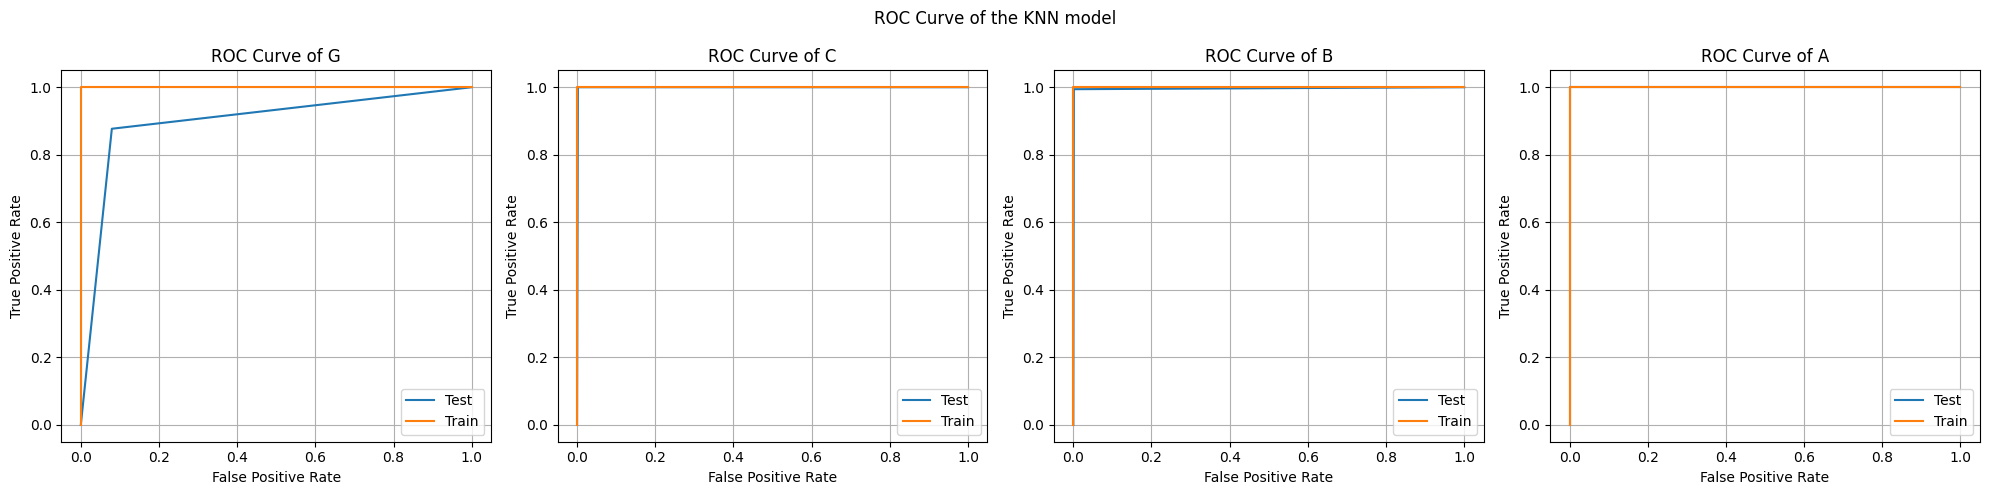

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))

for i in range(4):
  fpr_test, tpr_test, thresholds  = roc_curve(y_testarr[:,i], y_pred_test[:,i])
  fpr_train, tpr_train, thresholds = roc_curve(y_trainarr[:,i], y_pred_train[:,i])
  ax[i].plot(fpr_test, tpr_test, label=f'test {y.columns[i]}')
  ax[i].plot(fpr_train, tpr_train, label=f'train {y.columns[i]}')
  ax[i].set_xlabel('False Positive Rate')
  ax[i].set_ylabel('True Positive Rate')
  ax[i].set_title(f'ROC Curve of {y.columns[i]}')
  ax[i].legend(['Test','Train'])
  ax[i].grid(True)

plt.suptitle('ROC Curve of the KNN model')
plt.tight_layout()

### Random Forest with Gridsearch

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100,200,300,500,600,700,800,900,1000],
}

gs_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=3,scoring='accuracy')
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.859 total time=   1.9s
[CV 2/5] END ..................n_estimators=100;, score=0.875 total time=   1.5s
[CV 3/5] END ..................n_estimators=100;, score=0.872 total time=   1.2s
[CV 4/5] END ..................n_estimators=100;, score=0.866 total time=   1.2s
[CV 5/5] END ..................n_estimators=100;, score=0.863 total time=   1.2s
[CV 1/5] END ..................n_estimators=200;, score=0.858 total time=   2.4s
[CV 2/5] END ..................n_estimators=200;, score=0.878 total time=   2.4s
[CV 3/5] END ..................n_estimators=200;, score=0.875 total time=   3.0s
[CV 4/5] END ..................n_estimators=200;, score=0.869 total time=   3.1s
[CV 5/5] END ..................n_estimators=200;, score=0.864 total time=   2.3s
[CV 1/5] END ..................n_estimators=300;, score=0.857 total time=   3.5s
[CV 2/5] END ..................n_estimators=300;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 500, 600, 700, 800,
                                          900, 1000]},
             scoring='accuracy', verbose=3)

In [ ]:
print(f'best parameter for random forest is: {gs_model.best_params_}')

best parameter for random forest is: {'n_estimators': 300}


In [ ]:
print(f'best score for random forest is: {gs_model.best_score_}')

best score for random forest is: 0.8687976900106621


In [ ]:
gs_model.best_estimator_

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred_test = gs_model.predict(X_test)
y_pred_train = gs_model.predict(X_train)

In [ ]:
print(f'accuracy of training set: {accuracy_score(y_train, y_pred_train)}')
print(f'accuracy of testing set: {accuracy_score(y_test, y_pred_test)}')

accuracy of training set: 1.0
accuracy of testing set: 0.8862047043865225


In [ ]:
print('Classification report of testing set:')
print(classification_report(y_test, y_pred_test))

Classification report of testing set:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       691
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       849
           3       1.00      1.00      1.00       890

   micro avg       0.97      0.97      0.97      3041
   macro avg       0.97      0.96      0.97      3041
weighted avg       0.97      0.97      0.97      3041
 samples avg       0.68      0.68      0.68      3041



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Classification report of training set:')
print(classification_report(y_train, y_pred_train))

Classification report of training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2705
           1       1.00      1.00      1.00      2622
           2       1.00      1.00      1.00      3518
           3       1.00      1.00      1.00      3602

   micro avg       1.00      1.00      1.00     12447
   macro avg       1.00      1.00      1.00     12447
weighted avg       1.00      1.00      1.00     12447
 samples avg       0.70      0.70      0.70     12447



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('roc_auc_score of testing set:')
print(roc_auc_score(y_test, y_pred_test))

roc_auc_score of testing set:
0.9705627271711933


In [ ]:
print('roc_auc_score of training set:')
print(roc_auc_score(y_train, y_pred_train))

roc_auc_score of training set:
1.0


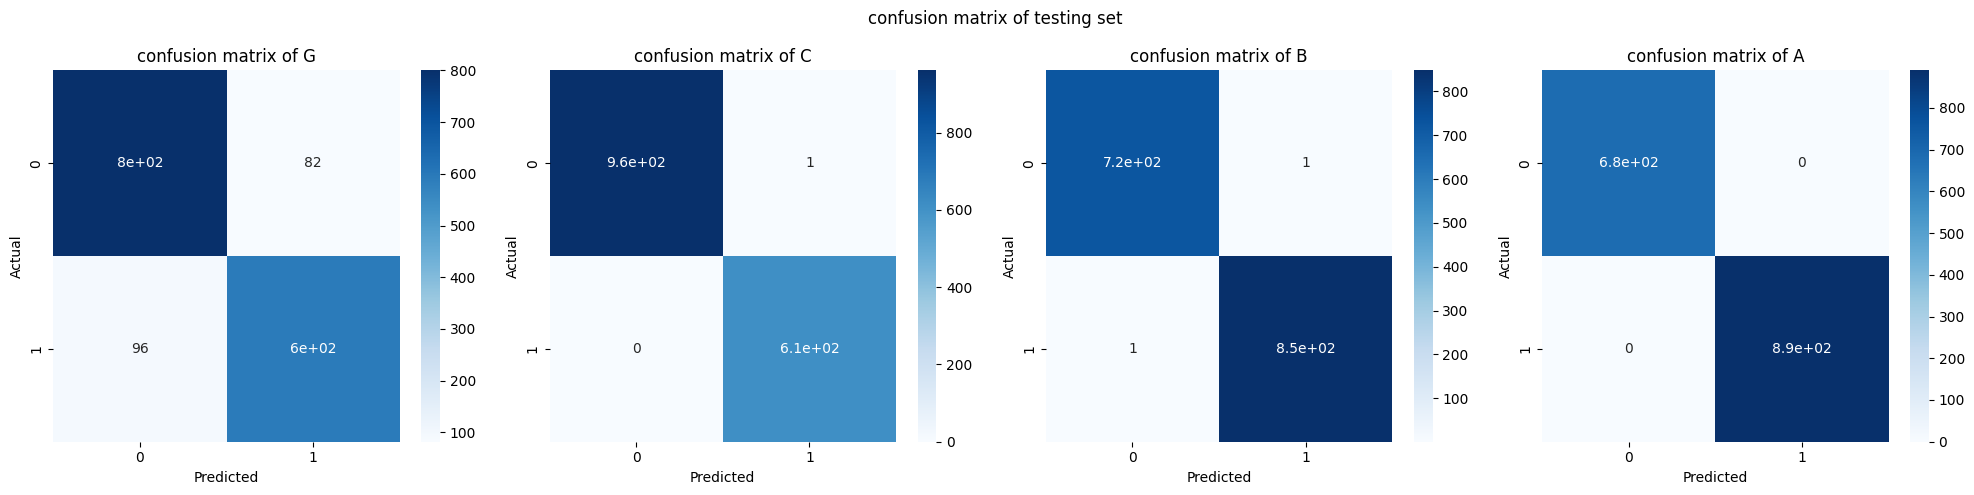

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  sns.heatmap(confusion_matrix(y_testarr[:,i], y_pred_test[:,i]), annot=True, cmap='Blues',ax=ax[i])
  ax[i].set_title(f'confusion matrix of {y.columns[i]}')
  ax[i].set_xlabel('Predicted')
  ax[i].set_ylabel('Actual')

plt.suptitle('confusion matrix of testing set')
plt.tight_layout()

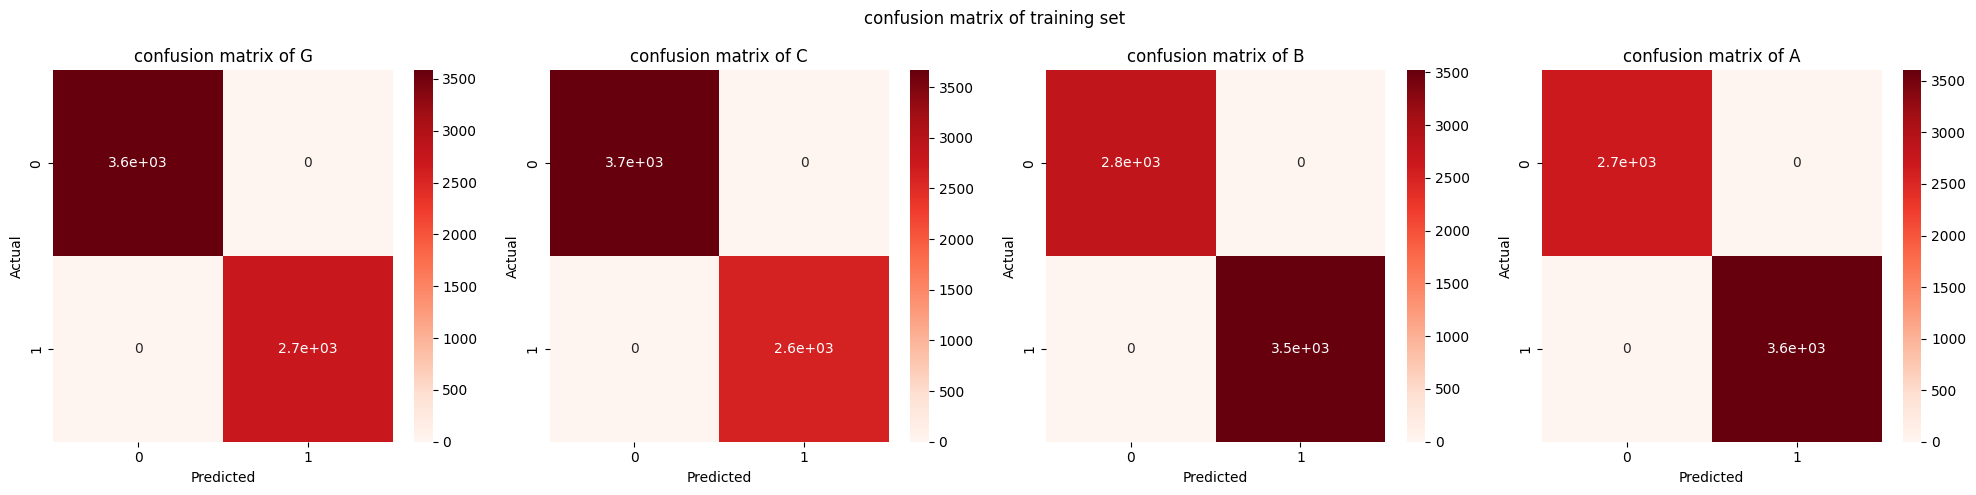

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  sns.heatmap(confusion_matrix(y_trainarr[:,i], y_pred_train[:,i]), annot=True, cmap='Reds',ax=ax[i])
  ax[i].set_title(f'confusion matrix of {y.columns[i]}')
  ax[i].set_xlabel('Predicted')
  ax[i].set_ylabel('Actual')

plt.suptitle('confusion matrix of training set')
plt.tight_layout()

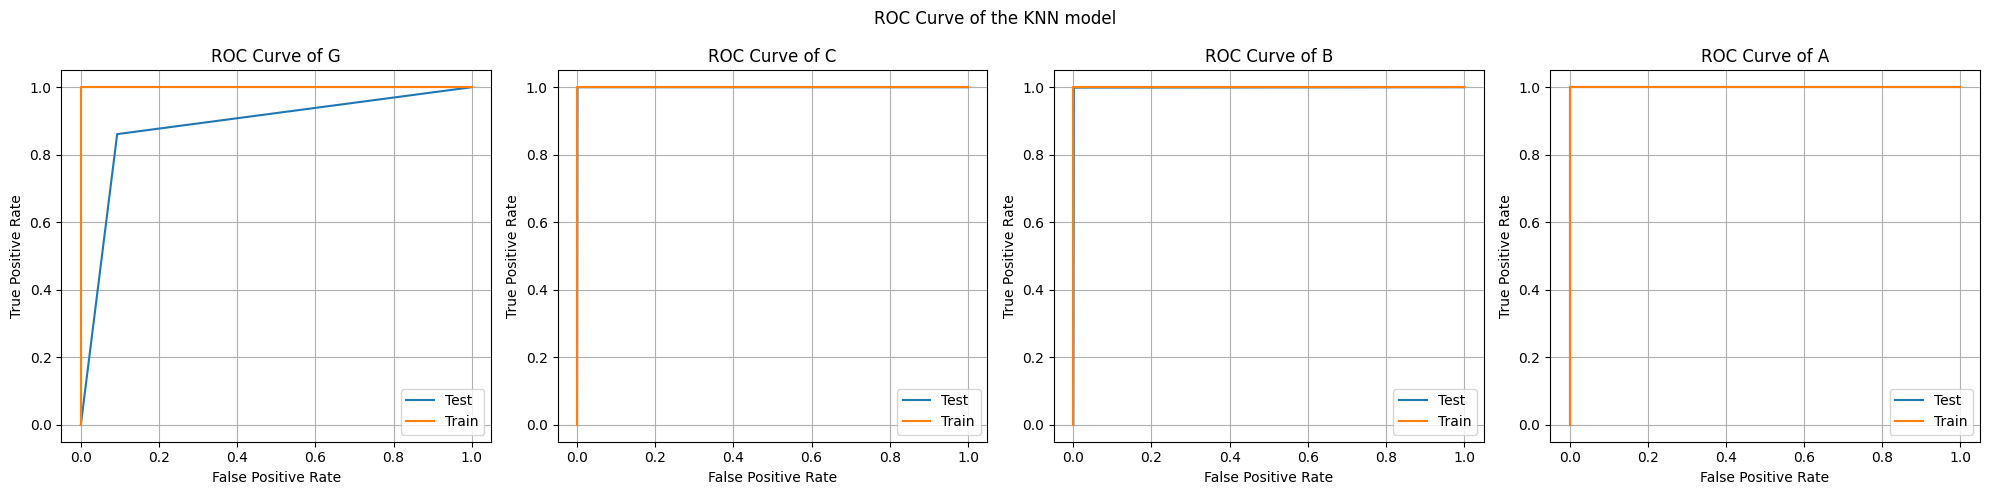

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,5))

for i in range(4):
  fpr_test, tpr_test, thresholds  = roc_curve(y_testarr[:,i], y_pred_test[:,i])
  fpr_train, tpr_train, thresholds = roc_curve(y_trainarr[:,i], y_pred_train[:,i])
  ax[i].plot(fpr_test, tpr_test, label=f'test {y.columns[i]}')
  ax[i].plot(fpr_train, tpr_train, label=f'train {y.columns[i]}')
  ax[i].set_xlabel('False Positive Rate')
  ax[i].set_ylabel('True Positive Rate')
  ax[i].set_title(f'ROC Curve of {y.columns[i]}')
  ax[i].legend(['Test','Train'])
  ax[i].grid(True)

plt.suptitle('ROC Curve of the KNN model')
plt.tight_layout()

### Stacking with svc, knn and xgboost

In [ ]:
fproject_data_copy.head()

,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [ ]:
fproject_data_copy.replace({'NO Fault': 0 ,
                'Line A to Ground Fault':1,
                'Line A Line B to Ground Fault':2,
                'Line B to Line C Fault':3,
                'Line A Line B Line C':4,
                'Line A Line B Line C to Ground Fault':5},inplace = True)

<ipython-input-175-bd465f33cf86>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fproject_data_copy.replace({'NO Fault': 0 ,


In [ ]:
fproject_data_copy.head()

,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1


In [ ]:
X_s = fproject_data_copy.drop(columns =['faultType'])
y_s = fproject_data_copy['faultType']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('svc', SVC(C=10,gamma=1,kernel='rbf',degree=3)),
    ('knn', KNeighborsClassifier(n_neighbors=4,p=2,weights='distance',algorithm='ball_tree')),
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=10,min_samples_leaf=5)
)

stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('svc', SVC(C=10, gamma=1)),
                               ('knn',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     n_neighbors=4,
                                                     weights='distance'))],
                   final_estimator=RandomForestClassifier(max_depth=10,
                                                          min_samples_leaf=5,
                                                          min_samples_split=10,
                                                          n_estimators=1000))

In [ ]:
# plotting the confusion matrix
y_pred_test = stacking_model.predict(X_test)
y_pred_train = stacking_model.predict(X_train)

In [ ]:
stacking_model.score(X_test, y_test)

0.9783852511125238

In [ ]:
stacking_model.score(X_train, y_train)

1.0

<Axes: >

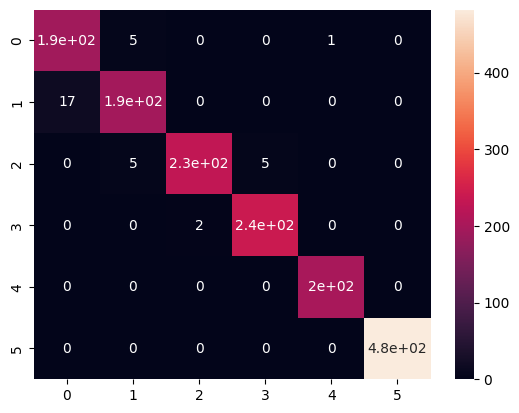

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [ ]:
y_test.unique()

array(['NO Fault', 'Line A Line B to Ground Fault',
       'Line A to Ground Fault', 'Line B to Line C Fault',
       'Line A Line B Line C', 'Line A Line B Line C to Ground Fault'],
      dtype=object)

In [ ]:
classification_report(y_test, y_pred_test)

'                                      precision    recall  f1-score   support\n\n                Line A Line B Line C       0.92      0.97      0.95       199\nLine A Line B Line C to Ground Fault       0.95      0.92      0.93       211\n       Line A Line B to Ground Fault       0.99      0.96      0.97       238\n              Line A to Ground Fault       0.98      0.99      0.99       242\n              Line B to Line C Fault       1.00      1.00      1.00       201\n                            NO Fault       1.00      1.00      1.00       482\n\n                            accuracy                           0.98      1573\n                           macro avg       0.97      0.97      0.97      1573\n                        weighted avg       0.98      0.98      0.98      1573\n'

In [ ]:
y_pred_test_proba = stacking_model.predict_proba(X_test)
y_pred_train_proba = stacking_model.predict_proba(X_train)

In [ ]:
# getting the roc_auc score of testing and training
y_test_roc = roc_auc_score(y_test, y_pred_test_proba,multi_class='ovr')
y_train_roc = roc_auc_score(y_train, y_pred_train_proba,multi_class='ovr')

In [ ]:
# printing thescores
print("training roc_auc_score: ", y_train_roc)
print("testing roc_auc_score: ", y_test_roc)

train roc_auc_score:  1.0
test roc_auc_score:  0.9994146772947144


### Conclusion

After doing multiple models on my chosen dataset I have evaluated all of them and here are my conclusion and interpretations from the results: <br/> <br/>

Doing SVC with the use of Pipeline and gridsearch shows a non underfitting and overfitting model because both accuracy of testing and training dataset are close to each other with 87% accueracy on the training and 86% accuracy on the testing set but the required accuracy score of 95% did not meet the model <br/> <br/>

Doing a KNN with the use of gridsearch shows an overfitting model, because the difference of accuracies of both training and testing dataset are much larger than the difference of the svc model that I did <br/> <br/>

While doing a random forest with grid search approach also shows an overfitting model because the training sett got a 100 percent accuracy score, while the testing accuracy got an 86% accuracy and the testing set did not the required accuracy of a model  <br/> <br/>


while doing the stacking of all the model I've used, it shows a great model with an 97% accuracy score on the testing and 100% accuracy on the training set, it met the criteria of 95% accuracy requirement and it shows a non overfitting and non under fitting model because the difference of accuracies of training and testing are small <br/> <br/>

One of the observations that I observed while validating the model is that all of the first three models that I used are having a hardtime in predicting the G column of my dataset I've noticed it because it got a lower roc auc score and it has too many misclassifications from looking at the confusion matrix <br/> <br/>

after doing the project, I concluded that doing stacking and having to put parameters on every estimators on a stacking model increases the accuracy of your model, because having that parameters can help your model avoid overfitting and underfitting on the model